<a href="https://colab.research.google.com/github/azadeutsche114/Bag-of-words/blob/main/Edureka_Class_6_2_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset

In [ ]:
!wget https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv

--2022-09-06 02:01:00--  https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35735 (35K) [text/plain]
Saving to: ‘BostonHousing.csv’

BostonHousing.csv   100%[===================>]  34.90K  --.-KB/s    in 0.001s  

2022-09-06 02:01:00 (36.5 MB/s) - ‘BostonHousing.csv’ saved [35735/35735]



In [ ]:
df = pd.read_csv('BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Data Preprocessing

In [ ]:
df.shape

(506, 14)

In [ ]:
df.isna().sum() # missing values

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

# Data Analysis

In [ ]:
# fill with mean/median value for continuous data
# fill with model for categorical data

# Heatmap
# correlation --> numerical value which represents how one variable is related to another variable
# ranges from -1 to +1

# correlation = +1 --> increase in one variable will result in increase of another
# correlation = -1 --> increase in one variable will result in decrease of another

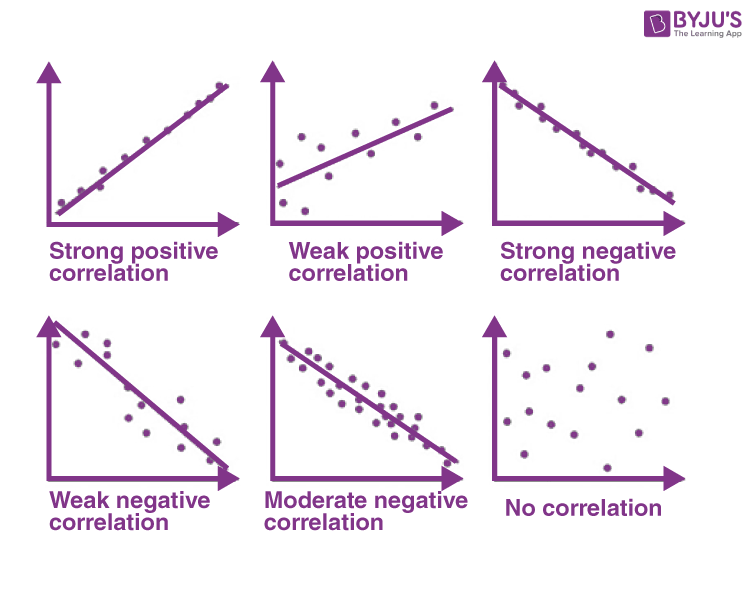

In [ ]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


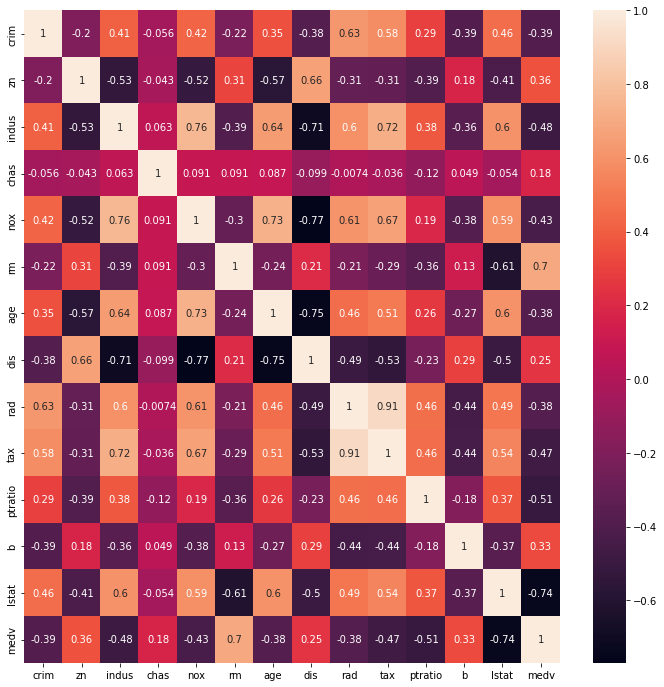

In [ ]:
#heatmap
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
# General rule
# input should have positive/negetive correlation between them for linear regression model

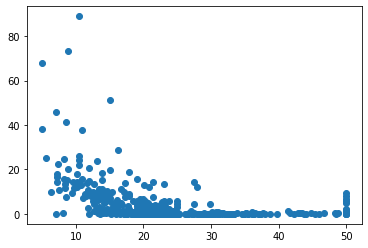

In [ ]:
plt.plot(df['medv'],df['crim'],"o")
plt.show()

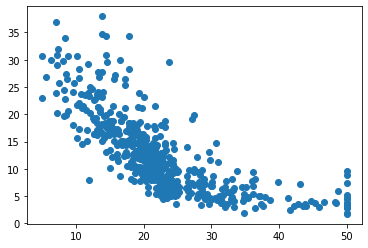

In [ ]:
plt.plot(df['medv'],df['lstat'],"o")
plt.show()

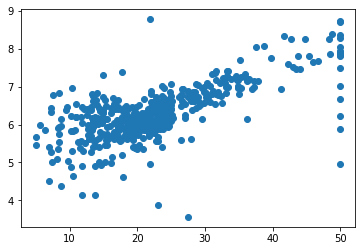

In [ ]:
plt.plot(df['medv'],df['rm'],"o")
plt.show()

# Prepared the data for model

In [ ]:
# check all the columns are numeric
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [ ]:
# separate input and output
X = df.drop(columns='medv')
y = df['medv']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [ ]:
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
37,0.08014,0.0,5.96,0,0.499,5.850,41.5,3.9342,5,279,19.2,396.90,8.77
286,0.01965,80.0,1.76,0,0.385,6.230,31.5,9.0892,1,241,18.2,341.60,12.93
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
25,0.84054,0.0,8.14,0,0.538,5.599,85.7,4.4546,4,307,21.0,303.42,16.51


In [ ]:
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [ ]:
y_train.shape,y_test.shape

((404,), (102,))

# Apply the Model - fit

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr.coef_

array([-1.08223557e-01,  3.89039349e-02, -1.51517627e-02,  3.15897941e+00,
       -1.65854070e+01,  3.63288486e+00,  9.35052187e-03, -1.38618151e+00,
        3.24065945e-01, -1.16245167e-02, -1.03644251e+00,  1.16127489e-02,
       -5.58409340e-01])

In [ ]:
len(lr.coef_) # co-efficients

13

In [ ]:
lr.intercept_

37.19980774264986

# Generate the Prediction

In [ ]:
#new data
lr.predict(X_test)

array([23.01506153, 21.2115869 , 33.71590384, 31.56542369,  3.1826268 ,
        3.15381954, 27.40305304, 22.2126176 , 14.86506114, 21.34105453,
       30.95942941, 26.70065029, 21.12624382, 18.37282564, 17.64315354,
       25.38194186, 24.42970445, 13.36957057,  8.66686786, 18.57490534,
       21.73966467, 20.34270529, 36.5461105 , 20.59627495, 19.87979627,
       15.75766967, 37.11632999, 34.85897895, 30.83458635, 23.23441285,
       18.68278505, 20.749546  , 31.84560076, 30.20214207, 13.3861702 ,
       15.87078398, 13.70766096, 23.74163998, 25.95135088, 23.18325878,
       28.99906539, 12.50341936, 31.08347911,  6.39401895, 23.71801218,
       20.61523929, 33.15362417, 19.21862493, 35.89603081,  0.82365329,
       31.90288611, 31.69640543,  6.58849712, 34.62762996, 20.41162545,
       19.69277608, 19.53445865, 18.58689088, 15.81420496, 22.98764309,
       19.65947045, 16.36377019, 18.48783369, 32.76568172, 35.49022568,
       24.58349631, 41.5854766 , 32.94818456, 14.60990256, 27.43

In [ ]:
# Evaluation criteria
# Regression model --> r2_score, rmse, mae, mse

# Evaluate

In [ ]:
# r2_score --> describes how much variance of the output is explained by the input
# will vary between 0 and 1
# 1 --> highest value
# 0 --> lowest value

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
#r2_score
# Syntax --> r2_score(y_test,y_pred)

y_pred = lr.predict(X_test)

r2_score(y_test,y_pred)

0.7789207451814417

In [ ]:
# Using the features, we can explain 76.34% of variance in output

In [ ]:
mean_squared_error(y_test,y_pred)

18.495420122448397

In [ ]:
mean_absolute_error(y_test,y_pred)

3.113043746893429

In [ ]:
mean_squared_error(y_test,y_pred,squared=False) # Root Mean squared error

4.300630200615765

In [ ]:
# SGD --> Linear Regression

In [ ]:
X_test.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
463,5.82115,0.0,18.10,0,0.713,6.513,89.9,2.8016,24,666,20.2,393.82,10.29
152,1.12658,0.0,19.58,1,0.871,5.012,88.0,1.6102,5,403,14.7,343.28,12.12
291,0.07886,80.0,4.95,0,0.411,7.148,27.7,5.1167,4,245,19.2,396.90,3.56
183,0.10008,0.0,2.46,0,0.488,6.563,95.6,2.8470,3,193,17.8,396.90,5.68
384,20.08490,0.0,18.10,0,0.700,4.368,91.2,1.4395,24,666,20.2,285.83,30.63


In [ ]:
y_test.head()

463    20.2
152    15.3
291    37.3
183    32.5
384     8.8
Name: medv, dtype: float64

# Stochastic Gradient Descent

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
sgd = SGDRegressor()
sgd.fit(X_train,y_train)

SGDRegressor()

In [ ]:
sgd.coef_

array([ 1.29327600e+11, -6.13966950e+10,  3.51892450e+11,  2.58074180e+10,
        4.07323148e+09, -6.77138714e+10, -1.39224757e+11, -7.94142022e+09,
        2.21570061e+11, -2.10293323e+11, -1.61654165e+11,  8.17760525e+10,
        4.61241201e+11])

In [ ]:
lr.coef_

array([-1.08223557e-01,  3.89039349e-02, -1.51517627e-02,  3.15897941e+00,
       -1.65854070e+01,  3.63288486e+00,  9.35052187e-03, -1.38618151e+00,
        3.24065945e-01, -1.16245167e-02, -1.03644251e+00,  1.16127489e-02,
       -5.58409340e-01])

In [ ]:
sgd.intercept_

array([-1.79419159e+10])

In [ ]:
y_pred = sgd.predict(X_test)
r2_score(y_test,y_pred)

-5.166620048604174e+25